# 1 Project Overview

This will start with data wrangling and exploratory data analysis to visually observe of the effectiveness of various factors on the temperature-dependent mechanical properties.For this we obtain the data from our MD simulations


# 2 Data Wrangling

In [1]:
#first we import all the libraries we will use in this study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_validate
from sklearn.preprocessing import StandardScaler
#from library.sb_utils import save_file

# Modeling Libraries
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, SGDRegressor, PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Evaluation & CV Libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Neural Network
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam

In [2]:
#read input file
data=pd.read_csv("../Data/analysis.csv",index_col=0)
data["pore volume"]=1-data["real_volume_ratio"]

# Modeling

# 1 output variable and 5 input variable

In [3]:
prop=['precipitate_number','T', 'mean_radius', 'large_to_low_ratio',"pore volume"]
l1=[col for col in data.columns if col not in prop]
#print(l1)
x_1=data.drop(l1,axis=1)
#print(x_1.head())

y_1=data[["elastic_modulous"]] #[features]

#y=y.reset_index(drop=True)
#print(y)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(x_train_1)
x_train_1 = scaler.transform(x_train_1)
x_test_1 = scaler.transform(x_test_1)

In [4]:
#Create the layers
n=5 #neuron
input_layer=Input(shape=(5,),name='input_layer')
layer_1=Dense(n,activation="relu",name='layer_1')(input_layer)
layer_2=Dense(n,activation="relu",name='layer_2')(layer_1)

#1st output
y1_output=Dense(1,activation="linear",name='y1_output')(layer_2)

#Define the model
model_1=Model(inputs=input_layer,outputs=y1_output)#[,y3_output]

#MSummary of Model
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 5)]               0         
                                                                 
 layer_1 (Dense)             (None, 5)                 30        
                                                                 
 layer_2 (Dense)             (None, 5)                 30        
                                                                 
 y1_output (Dense)           (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [5]:
## defining the optimiser and loss function
model_1.compile(optimizer='adam', loss={'y1_output':'mse'}) #,'y3_output':'mse'

##train the model
history_1=model_1.fit(x_train_1,y_train_1,epochs=1000, batch_size=128, validation_data=(x_test_1,y_test_1))

Epoch 1/1000
4/4 [==============================] - 3s 80ms/step - loss: 3202.6113 - val_loss: 3187.7996
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 3195.2048 - val_loss: 3179.7161
Epoch 3/1000
4/4 [==============================] - 0s 23ms/step - loss: 3187.6816 - val_loss: 3171.4395
Epoch 4/1000
4/4 [==============================] - 0s 23ms/step - loss: 3179.8765 - val_loss: 3162.9343
Epoch 5/1000
4/4 [==============================] - 0s 17ms/step - loss: 3171.9836 - val_loss: 3154.0278
Epoch 6/1000
4/4 [==============================] - 0s 16ms/step - loss: 3163.8130 - val_loss: 3144.8950
Epoch 7/1000
4/4 [==============================] - 0s 17ms/step - loss: 3155.3188 - val_loss: 3135.5825
Epoch 8/1000
4/4 [==============================] - 0s 19ms/step - loss: 3146.7490 - val_loss: 3125.9380
Epoch 9/1000
4/4 [==============================] - 0s 19ms/step - loss: 3137.6917 - val_loss: 3116.0312
Epoch 10/1000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 12ms/step - loss: 1858.9514 - val_loss: 1766.7515
Epoch 79/1000
4/4 [==============================] - 0s 13ms/step - loss: 1833.5577 - val_loss: 1741.0560
Epoch 80/1000
4/4 [==============================] - 0s 12ms/step - loss: 1808.2966 - val_loss: 1715.3790
Epoch 81/1000
4/4 [==============================] - 0s 13ms/step - loss: 1782.8231 - val_loss: 1689.7457
Epoch 82/1000
4/4 [==============================] - 0s 12ms/step - loss: 1757.4725 - val_loss: 1664.1362
Epoch 83/1000
4/4 [==============================] - 0s 15ms/step - loss: 1732.2234 - val_loss: 1638.5676
Epoch 84/1000
4/4 [==============================] - 0s 13ms/step - loss: 1706.8370 - val_loss: 1613.1312
Epoch 85/1000
4/4 [==============================] - 0s 15ms/step - loss: 1681.5637 - val_loss: 1587.8042
Epoch 86/1000
4/4 [==============================] - 0s 12ms/step - loss: 1656.6498 - val_loss: 1562.5018
Epoch 87/1000
4/4 [==============================] - 0s 13ms

4/4 [==============================] - 0s 14ms/step - loss: 559.9130 - val_loss: 534.0890
Epoch 156/1000
4/4 [==============================] - 0s 16ms/step - loss: 553.8491 - val_loss: 529.0155
Epoch 157/1000
4/4 [==============================] - 0s 14ms/step - loss: 547.5879 - val_loss: 524.2199
Epoch 158/1000
4/4 [==============================] - 0s 13ms/step - loss: 541.7460 - val_loss: 519.5590
Epoch 159/1000
4/4 [==============================] - 0s 13ms/step - loss: 536.1295 - val_loss: 515.0394
Epoch 160/1000
4/4 [==============================] - 0s 12ms/step - loss: 530.5326 - val_loss: 510.6235
Epoch 161/1000
4/4 [==============================] - 0s 12ms/step - loss: 525.2439 - val_loss: 506.2986
Epoch 162/1000
4/4 [==============================] - 0s 13ms/step - loss: 519.9764 - val_loss: 502.0974
Epoch 163/1000
4/4 [==============================] - 0s 12ms/step - loss: 515.0075 - val_loss: 497.9924
Epoch 164/1000
4/4 [==============================] - 0s 12ms/step - l

4/4 [==============================] - 0s 13ms/step - loss: 295.9438 - val_loss: 305.4550
Epoch 234/1000
4/4 [==============================] - 0s 15ms/step - loss: 293.7030 - val_loss: 303.2487
Epoch 235/1000
4/4 [==============================] - 0s 16ms/step - loss: 291.4900 - val_loss: 301.0718
Epoch 236/1000
4/4 [==============================] - 0s 18ms/step - loss: 289.3500 - val_loss: 298.8765
Epoch 237/1000
4/4 [==============================] - 0s 16ms/step - loss: 287.1379 - val_loss: 296.7202
Epoch 238/1000
4/4 [==============================] - 0s 20ms/step - loss: 284.9737 - val_loss: 294.5611
Epoch 239/1000
4/4 [==============================] - 0s 13ms/step - loss: 282.7501 - val_loss: 292.4425
Epoch 240/1000
4/4 [==============================] - 0s 18ms/step - loss: 280.6530 - val_loss: 290.2629
Epoch 241/1000
4/4 [==============================] - 0s 13ms/step - loss: 278.5294 - val_loss: 288.0508
Epoch 242/1000
4/4 [==============================] - 0s 14ms/step - l

4/4 [==============================] - 0s 16ms/step - loss: 149.6456 - val_loss: 159.3554
Epoch 312/1000
4/4 [==============================] - 0s 14ms/step - loss: 148.2157 - val_loss: 157.8638
Epoch 313/1000
4/4 [==============================] - 0s 14ms/step - loss: 146.8029 - val_loss: 156.4039
Epoch 314/1000
4/4 [==============================] - 0s 14ms/step - loss: 145.3917 - val_loss: 154.9307
Epoch 315/1000
4/4 [==============================] - 0s 15ms/step - loss: 143.9924 - val_loss: 153.4550
Epoch 316/1000
4/4 [==============================] - 0s 23ms/step - loss: 142.6378 - val_loss: 151.9450
Epoch 317/1000
4/4 [==============================] - 0s 25ms/step - loss: 141.2742 - val_loss: 150.4895
Epoch 318/1000
4/4 [==============================] - 0s 14ms/step - loss: 139.8803 - val_loss: 149.0279
Epoch 319/1000
4/4 [==============================] - 0s 14ms/step - loss: 138.5508 - val_loss: 147.5228
Epoch 320/1000
4/4 [==============================] - 0s 12ms/step - l

Epoch 390/1000
4/4 [==============================] - 0s 13ms/step - loss: 70.2632 - val_loss: 72.3173
Epoch 391/1000
4/4 [==============================] - 0s 13ms/step - loss: 69.6185 - val_loss: 71.6331
Epoch 392/1000
4/4 [==============================] - 0s 15ms/step - loss: 69.0169 - val_loss: 70.9426
Epoch 393/1000
4/4 [==============================] - 0s 15ms/step - loss: 68.3904 - val_loss: 70.2751
Epoch 394/1000
4/4 [==============================] - 0s 13ms/step - loss: 67.7845 - val_loss: 69.6066
Epoch 395/1000
4/4 [==============================] - 0s 12ms/step - loss: 67.1927 - val_loss: 68.9309
Epoch 396/1000
4/4 [==============================] - 0s 14ms/step - loss: 66.6037 - val_loss: 68.2647
Epoch 397/1000
4/4 [==============================] - 0s 12ms/step - loss: 66.0316 - val_loss: 67.6165
Epoch 398/1000
4/4 [==============================] - 0s 11ms/step - loss: 65.4604 - val_loss: 66.9745
Epoch 399/1000
4/4 [==============================] - 0s 13ms/step - loss

4/4 [==============================] - 0s 13ms/step - loss: 38.6010 - val_loss: 37.6499
Epoch 470/1000
4/4 [==============================] - 0s 12ms/step - loss: 38.3469 - val_loss: 37.3827
Epoch 471/1000
4/4 [==============================] - 0s 13ms/step - loss: 38.1029 - val_loss: 37.1250
Epoch 472/1000
4/4 [==============================] - 0s 12ms/step - loss: 37.8627 - val_loss: 36.8698
Epoch 473/1000
4/4 [==============================] - 0s 14ms/step - loss: 37.6250 - val_loss: 36.6112
Epoch 474/1000
4/4 [==============================] - 0s 12ms/step - loss: 37.3917 - val_loss: 36.3520
Epoch 475/1000
4/4 [==============================] - 0s 14ms/step - loss: 37.1496 - val_loss: 36.1110
Epoch 476/1000
4/4 [==============================] - 0s 11ms/step - loss: 36.9119 - val_loss: 35.8739
Epoch 477/1000
4/4 [==============================] - 0s 12ms/step - loss: 36.6835 - val_loss: 35.6256
Epoch 478/1000
4/4 [==============================] - 0s 13ms/step - loss: 36.4433 - val

4/4 [==============================] - 0s 13ms/step - loss: 23.9886 - val_loss: 23.2261
Epoch 549/1000
4/4 [==============================] - 0s 11ms/step - loss: 23.8461 - val_loss: 23.0921
Epoch 550/1000
4/4 [==============================] - 0s 10ms/step - loss: 23.7117 - val_loss: 22.9658
Epoch 551/1000
4/4 [==============================] - 0s 13ms/step - loss: 23.5785 - val_loss: 22.8414
Epoch 552/1000
4/4 [==============================] - 0s 13ms/step - loss: 23.4508 - val_loss: 22.7133
Epoch 553/1000
4/4 [==============================] - 0s 10ms/step - loss: 23.3189 - val_loss: 22.5843
Epoch 554/1000
4/4 [==============================] - 0s 13ms/step - loss: 23.1854 - val_loss: 22.4579
Epoch 555/1000
4/4 [==============================] - 0s 10ms/step - loss: 23.0585 - val_loss: 22.3372
Epoch 556/1000
4/4 [==============================] - 0s 13ms/step - loss: 22.9353 - val_loss: 22.2215
Epoch 557/1000
4/4 [==============================] - 0s 10ms/step - loss: 22.8100 - val

4/4 [==============================] - 0s 13ms/step - loss: 15.9015 - val_loss: 15.7205
Epoch 628/1000
4/4 [==============================] - 0s 13ms/step - loss: 15.8231 - val_loss: 15.6506
Epoch 629/1000
4/4 [==============================] - 0s 17ms/step - loss: 15.7496 - val_loss: 15.5789
Epoch 630/1000
4/4 [==============================] - 0s 23ms/step - loss: 15.6657 - val_loss: 15.5156
Epoch 631/1000
4/4 [==============================] - 0s 17ms/step - loss: 15.5933 - val_loss: 15.4443
Epoch 632/1000
4/4 [==============================] - 0s 10ms/step - loss: 15.5138 - val_loss: 15.3778
Epoch 633/1000
4/4 [==============================] - 0s 10ms/step - loss: 15.4371 - val_loss: 15.3166
Epoch 634/1000
4/4 [==============================] - 0s 13ms/step - loss: 15.3599 - val_loss: 15.2508
Epoch 635/1000
4/4 [==============================] - 0s 13ms/step - loss: 15.2855 - val_loss: 15.1883
Epoch 636/1000
4/4 [==============================] - 0s 13ms/step - loss: 15.2098 - val

4/4 [==============================] - 0s 17ms/step - loss: 11.2388 - val_loss: 11.7639
Epoch 707/1000
4/4 [==============================] - 0s 13ms/step - loss: 11.1950 - val_loss: 11.7289
Epoch 708/1000
4/4 [==============================] - 0s 13ms/step - loss: 11.1525 - val_loss: 11.6939
Epoch 709/1000
4/4 [==============================] - 0s 13ms/step - loss: 11.1116 - val_loss: 11.6577
Epoch 710/1000
4/4 [==============================] - 0s 13ms/step - loss: 11.0698 - val_loss: 11.6195
Epoch 711/1000
4/4 [==============================] - 0s 24ms/step - loss: 11.0261 - val_loss: 11.5829
Epoch 712/1000
4/4 [==============================] - 0s 13ms/step - loss: 10.9852 - val_loss: 11.5502
Epoch 713/1000
4/4 [==============================] - 0s 13ms/step - loss: 10.9420 - val_loss: 11.5202
Epoch 714/1000
4/4 [==============================] - 0s 10ms/step - loss: 10.9030 - val_loss: 11.4900
Epoch 715/1000
4/4 [==============================] - 0s 13ms/step - loss: 10.8587 - val

4/4 [==============================] - 0s 12ms/step - loss: 8.4274 - val_loss: 9.4144
Epoch 787/1000
4/4 [==============================] - 0s 13ms/step - loss: 8.3986 - val_loss: 9.3887
Epoch 788/1000
4/4 [==============================] - 0s 13ms/step - loss: 8.3685 - val_loss: 9.3619
Epoch 789/1000
4/4 [==============================] - 0s 13ms/step - loss: 8.3411 - val_loss: 9.3375
Epoch 790/1000
4/4 [==============================] - 0s 11ms/step - loss: 8.3090 - val_loss: 9.3132
Epoch 791/1000
4/4 [==============================] - 0s 13ms/step - loss: 8.2784 - val_loss: 9.2899
Epoch 792/1000
4/4 [==============================] - 0s 13ms/step - loss: 8.2500 - val_loss: 9.2644
Epoch 793/1000
4/4 [==============================] - 0s 13ms/step - loss: 8.2199 - val_loss: 9.2415
Epoch 794/1000
4/4 [==============================] - 0s 10ms/step - loss: 8.1899 - val_loss: 9.2140
Epoch 795/1000
4/4 [==============================] - 0s 13ms/step - loss: 8.1600 - val_loss: 9.1856
Epoch

4/4 [==============================] - 0s 13ms/step - loss: 6.2497 - val_loss: 7.5425
Epoch 868/1000
4/4 [==============================] - 0s 13ms/step - loss: 6.2235 - val_loss: 7.5282
Epoch 869/1000
4/4 [==============================] - 0s 15ms/step - loss: 6.1993 - val_loss: 7.5077
Epoch 870/1000
4/4 [==============================] - 0s 13ms/step - loss: 6.1777 - val_loss: 7.4870
Epoch 871/1000
4/4 [==============================] - 0s 12ms/step - loss: 6.1521 - val_loss: 7.4690
Epoch 872/1000
4/4 [==============================] - 0s 13ms/step - loss: 6.1305 - val_loss: 7.4554
Epoch 873/1000
4/4 [==============================] - 0s 11ms/step - loss: 6.1058 - val_loss: 7.4389
Epoch 874/1000
4/4 [==============================] - 0s 12ms/step - loss: 6.0823 - val_loss: 7.4186
Epoch 875/1000
4/4 [==============================] - 0s 12ms/step - loss: 6.0604 - val_loss: 7.3994
Epoch 876/1000
4/4 [==============================] - 0s 12ms/step - loss: 6.0360 - val_loss: 7.3801
Epoch

4/4 [==============================] - 0s 19ms/step - loss: 4.5340 - val_loss: 5.9910
Epoch 949/1000
4/4 [==============================] - 0s 73ms/step - loss: 4.5166 - val_loss: 5.9770
Epoch 950/1000
4/4 [==============================] - 0s 34ms/step - loss: 4.4991 - val_loss: 5.9645
Epoch 951/1000
4/4 [==============================] - 0s 18ms/step - loss: 4.4822 - val_loss: 5.9451
Epoch 952/1000
4/4 [==============================] - 0s 21ms/step - loss: 4.4656 - val_loss: 5.9292
Epoch 953/1000
4/4 [==============================] - 0s 22ms/step - loss: 4.4492 - val_loss: 5.9173
Epoch 954/1000
4/4 [==============================] - 0s 17ms/step - loss: 4.4345 - val_loss: 5.9062
Epoch 955/1000
4/4 [==============================] - 0s 18ms/step - loss: 4.4171 - val_loss: 5.8901
Epoch 956/1000
4/4 [==============================] - 0s 19ms/step - loss: 4.4010 - val_loss: 5.8725
Epoch 957/1000
4/4 [==============================] - 0s 20ms/step - loss: 4.3855 - val_loss: 5.8563
Epoch

4/4 [==============================] - 0s 3ms/step - loss: 5.3029


Text(0.5, 0, 'epochs')

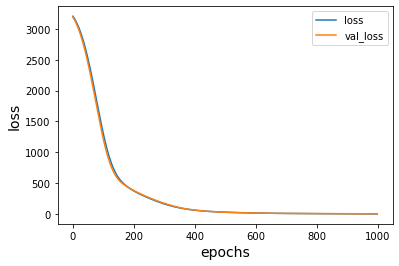

In [6]:
# Evalute the Model
model_1.evaluate(x_test_1, y_test_1)

# Plot loss VS epochs graph
pd.DataFrame(history_1.history).plot()
plt.ylabel('loss', fontsize=14)
plt.xlabel('epochs', fontsize=14)

In [7]:
predictions = model_1.predict(x_test_1)

4/4 [==============================] - 1s 1ms/step


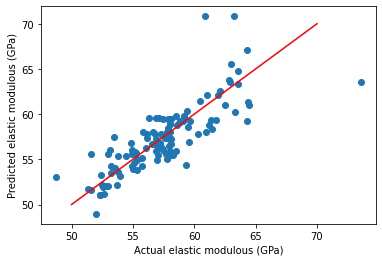

In [8]:
plt.scatter(y_test_1["elastic_modulous"],predictions ) #pred_2
plt.xlabel('Actual elastic modulous (GPa)')
plt.ylabel('Predicted elastic modulous (GPa)')
plt.plot([50,70],[50,70],marker=None,color="red")

# 2 output variable and 5 input variable

In [9]:
prop=['precipitate_number','T', 'mean_radius', 'large_to_low_ratio', 'pore volume']
l1=[col for col in data.columns if col not in prop]

x_2=data.drop(l1,axis=1)

y_2=data[["elastic_modulous","stress_yield"]] #[features]

#y=y.reset_index(drop=True)
#print(y)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(x_train_2)
x_train_2 = scaler.transform(x_train_2)
x_test_2 = scaler.transform(x_test_2)
#print(x_test_2)

In [10]:
#Create the layers
n=5 #neuron
input_layer=Input(shape=(5,),name='input_layer')
layer_1=Dense(n,activation="relu",name='layer_1')(input_layer)
layer_2=Dense(n,activation="relu",name='layer_2')(layer_1)


#1st output
y1_output=Dense(1,activation="linear",name='y1_output')(layer_2)

#branched layer 2 and 2nd output
branched_layer_1=Dense(n,activation="linear",name='branched_layer_1')(layer_2)
y2_output=Dense(1,activation="linear",name='y2_output')(branched_layer_1)


#Define the model
model_2=Model(inputs=input_layer,outputs=[y1_output,y2_output])#[,y3_output]

#MSummary of Model
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 5)]          0           []                               
                                                                                                  
 layer_1 (Dense)                (None, 5)            30          ['input_layer[0][0]']            
                                                                                                  
 layer_2 (Dense)                (None, 5)            30          ['layer_1[0][0]']                
                                                                                                  
 branched_layer_1 (Dense)       (None, 5)            30          ['layer_2[0][0]']                
                                                                                            

In [11]:
## defining the optimiser and loss function
model_2.compile(optimizer='adam', loss={'y1_output':'mse','y2_output':'mse'}) #,'y3_output':'mse'

##train the model
history_2=model_2.fit(x_train_2,y_train_2,epochs=1000, batch_size=128, validation_data=(x_test_2,y_test_2))

Epoch 1/1000
4/4 [==============================] - 2s 97ms/step - loss: 3281.6125 - y1_output_loss: 1675.2661 - y2_output_loss: 1606.3462 - val_loss: 3287.3218 - val_y1_output_loss: 1678.7811 - val_y2_output_loss: 1608.5406
Epoch 2/1000
4/4 [==============================] - 0s 17ms/step - loss: 3276.1860 - y1_output_loss: 1674.6223 - y2_output_loss: 1601.5638 - val_loss: 3281.8677 - val_y1_output_loss: 1678.1630 - val_y2_output_loss: 1603.7047
Epoch 3/1000
4/4 [==============================] - 0s 20ms/step - loss: 3270.4731 - y1_output_loss: 1673.9880 - y2_output_loss: 1596.4852 - val_loss: 3276.2153 - val_y1_output_loss: 1677.5377 - val_y2_output_loss: 1598.6776
Epoch 4/1000
4/4 [==============================] - 0s 26ms/step - loss: 3264.6177 - y1_output_loss: 1673.3632 - y2_output_loss: 1591.2543 - val_loss: 3270.3403 - val_y1_output_loss: 1676.9348 - val_y2_output_loss: 1593.4054
Epoch 5/1000
4/4 [==============================] - 0s 21ms/step - loss: 3258.5371 - y1_output_loss:

4/4 [==============================] - 0s 17ms/step - loss: 2841.5256 - y1_output_loss: 1660.7321 - y2_output_loss: 1180.7937 - val_loss: 2835.5903 - val_y1_output_loss: 1661.5496 - val_y2_output_loss: 1174.0409
Epoch 38/1000
4/4 [==============================] - 0s 15ms/step - loss: 2821.5991 - y1_output_loss: 1659.3990 - y2_output_loss: 1162.2003 - val_loss: 2815.0015 - val_y1_output_loss: 1660.0681 - val_y2_output_loss: 1154.9332
Epoch 39/1000
4/4 [==============================] - 0s 17ms/step - loss: 2801.5537 - y1_output_loss: 1657.9302 - y2_output_loss: 1143.6235 - val_loss: 2794.2844 - val_y1_output_loss: 1658.4026 - val_y2_output_loss: 1135.8818
Epoch 40/1000
4/4 [==============================] - 0s 17ms/step - loss: 2781.4197 - y1_output_loss: 1656.2897 - y2_output_loss: 1125.1298 - val_loss: 2773.4963 - val_y1_output_loss: 1656.6091 - val_y2_output_loss: 1116.8870
Epoch 41/1000
4/4 [==============================] - 0s 17ms/step - loss: 2761.3008 - y1_output_loss: 1654.489

4/4 [==============================] - 0s 21ms/step - loss: 2317.7778 - y1_output_loss: 1524.2703 - y2_output_loss: 793.5073 - val_loss: 2308.0623 - val_y1_output_loss: 1520.1371 - val_y2_output_loss: 787.9252
Epoch 74/1000
4/4 [==============================] - 0s 30ms/step - loss: 2310.3804 - y1_output_loss: 1519.4639 - y2_output_loss: 790.9164 - val_loss: 2301.1768 - val_y1_output_loss: 1515.3292 - val_y2_output_loss: 785.8477
Epoch 75/1000
4/4 [==============================] - 0s 25ms/step - loss: 2303.2478 - y1_output_loss: 1514.7091 - y2_output_loss: 788.5386 - val_loss: 2294.4521 - val_y1_output_loss: 1510.5458 - val_y2_output_loss: 783.9065
Epoch 76/1000
4/4 [==============================] - 0s 23ms/step - loss: 2296.1538 - y1_output_loss: 1509.9977 - y2_output_loss: 786.1561 - val_loss: 2287.9211 - val_y1_output_loss: 1505.7826 - val_y2_output_loss: 782.1386
Epoch 77/1000
4/4 [==============================] - 0s 23ms/step - loss: 2289.2207 - y1_output_loss: 1505.3401 - y2_o

4/4 [==============================] - 0s 21ms/step - loss: 2103.0942 - y1_output_loss: 1357.0295 - y2_output_loss: 746.0648 - val_loss: 2105.5435 - val_y1_output_loss: 1354.3707 - val_y2_output_loss: 751.1728
Epoch 110/1000
4/4 [==============================] - 0s 15ms/step - loss: 2097.5732 - y1_output_loss: 1352.1498 - y2_output_loss: 745.4236 - val_loss: 2100.2148 - val_y1_output_loss: 1349.5963 - val_y2_output_loss: 750.6187
Epoch 111/1000
4/4 [==============================] - 0s 12ms/step - loss: 2092.0454 - y1_output_loss: 1347.2772 - y2_output_loss: 744.7682 - val_loss: 2094.8584 - val_y1_output_loss: 1344.8240 - val_y2_output_loss: 750.0345
Epoch 112/1000
4/4 [==============================] - 0s 11ms/step - loss: 2086.5378 - y1_output_loss: 1342.3843 - y2_output_loss: 744.1535 - val_loss: 2089.5024 - val_y1_output_loss: 1340.0441 - val_y2_output_loss: 749.4583
Epoch 113/1000
4/4 [==============================] - 0s 13ms/step - loss: 2080.9846 - y1_output_loss: 1337.4552 - 

4/4 [==============================] - 0s 16ms/step - loss: 1895.4865 - y1_output_loss: 1164.2820 - y2_output_loss: 731.2045 - val_loss: 1901.7219 - val_y1_output_loss: 1164.3959 - val_y2_output_loss: 737.3262
Epoch 146/1000
4/4 [==============================] - 0s 13ms/step - loss: 1889.3068 - y1_output_loss: 1158.3052 - y2_output_loss: 731.0018 - val_loss: 1895.6318 - val_y1_output_loss: 1158.4801 - val_y2_output_loss: 737.1517
Epoch 147/1000
4/4 [==============================] - 0s 15ms/step - loss: 1883.1461 - y1_output_loss: 1152.3680 - y2_output_loss: 730.7780 - val_loss: 1889.5245 - val_y1_output_loss: 1152.5765 - val_y2_output_loss: 736.9480
Epoch 148/1000
4/4 [==============================] - 0s 19ms/step - loss: 1876.9392 - y1_output_loss: 1146.4110 - y2_output_loss: 730.5283 - val_loss: 1883.3610 - val_y1_output_loss: 1146.6771 - val_y2_output_loss: 736.6838
Epoch 149/1000
4/4 [==============================] - 0s 19ms/step - loss: 1870.6808 - y1_output_loss: 1140.3799 - 

4/4 [==============================] - 0s 63ms/step - loss: 1669.8302 - y1_output_loss: 944.2245 - y2_output_loss: 725.6057 - val_loss: 1678.5486 - val_y1_output_loss: 946.4374 - val_y2_output_loss: 732.1112
Epoch 182/1000
4/4 [==============================] - 0s 32ms/step - loss: 1663.8492 - y1_output_loss: 938.3492 - y2_output_loss: 725.4999 - val_loss: 1672.6029 - val_y1_output_loss: 940.6196 - val_y2_output_loss: 731.9833
Epoch 183/1000
4/4 [==============================] - 0s 27ms/step - loss: 1657.8777 - y1_output_loss: 932.4846 - y2_output_loss: 725.3932 - val_loss: 1666.6978 - val_y1_output_loss: 934.8267 - val_y2_output_loss: 731.8711
Epoch 184/1000
4/4 [==============================] - 0s 23ms/step - loss: 1651.9871 - y1_output_loss: 926.6886 - y2_output_loss: 725.2985 - val_loss: 1660.8429 - val_y1_output_loss: 929.0723 - val_y2_output_loss: 731.7706
Epoch 185/1000
4/4 [==============================] - 0s 23ms/step - loss: 1646.1145 - y1_output_loss: 920.9063 - y2_output

Epoch 218/1000
4/4 [==============================] - 0s 21ms/step - loss: 1498.5028 - y1_output_loss: 776.5699 - y2_output_loss: 721.9329 - val_loss: 1509.3369 - val_y1_output_loss: 781.2409 - val_y2_output_loss: 728.0961
Epoch 219/1000
4/4 [==============================] - 0s 50ms/step - loss: 1495.7069 - y1_output_loss: 773.8596 - y2_output_loss: 721.8475 - val_loss: 1506.5583 - val_y1_output_loss: 778.5583 - val_y2_output_loss: 727.9999
Epoch 220/1000
4/4 [==============================] - 0s 41ms/step - loss: 1493.0238 - y1_output_loss: 771.2475 - y2_output_loss: 721.7763 - val_loss: 1503.8953 - val_y1_output_loss: 775.9598 - val_y2_output_loss: 727.9353
Epoch 221/1000
4/4 [==============================] - 0s 27ms/step - loss: 1490.4111 - y1_output_loss: 768.6982 - y2_output_loss: 721.7129 - val_loss: 1501.3163 - val_y1_output_loss: 773.4705 - val_y2_output_loss: 727.8458
Epoch 222/1000
4/4 [==============================] - 0s 24ms/step - loss: 1487.9030 - y1_output_loss: 766.2

Epoch 255/1000
4/4 [==============================] - 0s 13ms/step - loss: 1444.7031 - y1_output_loss: 726.5226 - y2_output_loss: 718.1807 - val_loss: 1455.5919 - val_y1_output_loss: 731.6893 - val_y2_output_loss: 723.9025
Epoch 256/1000
4/4 [==============================] - 0s 14ms/step - loss: 1444.1260 - y1_output_loss: 726.0517 - y2_output_loss: 718.0743 - val_loss: 1454.9922 - val_y1_output_loss: 731.2203 - val_y2_output_loss: 723.7719
Epoch 257/1000
4/4 [==============================] - 0s 14ms/step - loss: 1443.5916 - y1_output_loss: 725.6254 - y2_output_loss: 717.9661 - val_loss: 1454.4039 - val_y1_output_loss: 730.7599 - val_y2_output_loss: 723.6440
Epoch 258/1000
4/4 [==============================] - 0s 13ms/step - loss: 1443.0758 - y1_output_loss: 725.2115 - y2_output_loss: 717.8644 - val_loss: 1453.8671 - val_y1_output_loss: 730.3474 - val_y2_output_loss: 723.5197
Epoch 259/1000
4/4 [==============================] - 0s 14ms/step - loss: 1442.5857 - y1_output_loss: 724.8

Epoch 292/1000
4/4 [==============================] - 0s 15ms/step - loss: 1432.2849 - y1_output_loss: 717.8899 - y2_output_loss: 714.3950 - val_loss: 1441.4841 - val_y1_output_loss: 722.2895 - val_y2_output_loss: 719.1946
Epoch 293/1000
4/4 [==============================] - 0s 11ms/step - loss: 1432.0773 - y1_output_loss: 717.7579 - y2_output_loss: 714.3195 - val_loss: 1441.2024 - val_y1_output_loss: 722.1259 - val_y2_output_loss: 719.0764
Epoch 294/1000
4/4 [==============================] - 0s 10ms/step - loss: 1431.8475 - y1_output_loss: 717.6209 - y2_output_loss: 714.2266 - val_loss: 1440.9226 - val_y1_output_loss: 721.9683 - val_y2_output_loss: 718.9543
Epoch 295/1000
4/4 [==============================] - 0s 10ms/step - loss: 1431.6178 - y1_output_loss: 717.4885 - y2_output_loss: 714.1293 - val_loss: 1440.6622 - val_y1_output_loss: 721.8204 - val_y2_output_loss: 718.8417
Epoch 296/1000
4/4 [==============================] - 0s 11ms/step - loss: 1431.3971 - y1_output_loss: 717.3

Epoch 329/1000
4/4 [==============================] - 0s 35ms/step - loss: 1425.1321 - y1_output_loss: 713.9100 - y2_output_loss: 711.2221 - val_loss: 1433.3068 - val_y1_output_loss: 717.9335 - val_y2_output_loss: 715.3733
Epoch 330/1000
4/4 [==============================] - 0s 92ms/step - loss: 1424.9576 - y1_output_loss: 713.8151 - y2_output_loss: 711.1425 - val_loss: 1433.1211 - val_y1_output_loss: 717.8365 - val_y2_output_loss: 715.2846
Epoch 331/1000
4/4 [==============================] - 0s 51ms/step - loss: 1424.7931 - y1_output_loss: 713.7255 - y2_output_loss: 711.0675 - val_loss: 1432.9475 - val_y1_output_loss: 717.7427 - val_y2_output_loss: 715.2047
Epoch 332/1000
4/4 [==============================] - 0s 39ms/step - loss: 1424.6188 - y1_output_loss: 713.6317 - y2_output_loss: 710.9871 - val_loss: 1432.7865 - val_y1_output_loss: 717.6522 - val_y2_output_loss: 715.1343
Epoch 333/1000
4/4 [==============================] - 0s 27ms/step - loss: 1424.4591 - y1_output_loss: 713.5

Epoch 366/1000
4/4 [==============================] - 0s 50ms/step - loss: 1419.5538 - y1_output_loss: 710.8214 - y2_output_loss: 708.7324 - val_loss: 1427.1031 - val_y1_output_loss: 714.6407 - val_y2_output_loss: 712.4624
Epoch 367/1000
4/4 [==============================] - 0s 39ms/step - loss: 1419.4250 - y1_output_loss: 710.7471 - y2_output_loss: 708.6779 - val_loss: 1426.9539 - val_y1_output_loss: 714.5599 - val_y2_output_loss: 712.3938
Epoch 368/1000
4/4 [==============================] - 0s 31ms/step - loss: 1419.2983 - y1_output_loss: 710.6721 - y2_output_loss: 708.6262 - val_loss: 1426.8079 - val_y1_output_loss: 714.4789 - val_y2_output_loss: 712.3290
Epoch 369/1000
4/4 [==============================] - 0s 34ms/step - loss: 1419.1638 - y1_output_loss: 710.5958 - y2_output_loss: 708.5681 - val_loss: 1426.6930 - val_y1_output_loss: 714.4119 - val_y2_output_loss: 712.2811
Epoch 370/1000
4/4 [==============================] - 0s 31ms/step - loss: 1419.0304 - y1_output_loss: 710.5

Epoch 403/1000
4/4 [==============================] - 0s 21ms/step - loss: 1415.2489 - y1_output_loss: 708.4341 - y2_output_loss: 706.8148 - val_loss: 1422.3337 - val_y1_output_loss: 712.0657 - val_y2_output_loss: 710.2679
Epoch 404/1000
4/4 [==============================] - 0s 23ms/step - loss: 1415.1652 - y1_output_loss: 708.3878 - y2_output_loss: 706.7774 - val_loss: 1422.2048 - val_y1_output_loss: 712.0045 - val_y2_output_loss: 710.2004
Epoch 405/1000
4/4 [==============================] - 0s 25ms/step - loss: 1415.0586 - y1_output_loss: 708.3322 - y2_output_loss: 706.7265 - val_loss: 1422.0991 - val_y1_output_loss: 711.9414 - val_y2_output_loss: 710.1578
Epoch 406/1000
4/4 [==============================] - 0s 19ms/step - loss: 1414.9591 - y1_output_loss: 708.2758 - y2_output_loss: 706.6833 - val_loss: 1422.0205 - val_y1_output_loss: 711.8926 - val_y2_output_loss: 710.1279
Epoch 407/1000
4/4 [==============================] - 0s 23ms/step - loss: 1414.8634 - y1_output_loss: 708.2

Epoch 440/1000
4/4 [==============================] - 0s 12ms/step - loss: 1412.0320 - y1_output_loss: 706.6687 - y2_output_loss: 705.3632 - val_loss: 1418.6653 - val_y1_output_loss: 710.0436 - val_y2_output_loss: 708.6218
Epoch 441/1000
4/4 [==============================] - 0s 13ms/step - loss: 1411.9531 - y1_output_loss: 706.6221 - y2_output_loss: 705.3309 - val_loss: 1418.5790 - val_y1_output_loss: 709.9916 - val_y2_output_loss: 708.5874
Epoch 442/1000
4/4 [==============================] - 0s 13ms/step - loss: 1411.8737 - y1_output_loss: 706.5787 - y2_output_loss: 705.2949 - val_loss: 1418.5105 - val_y1_output_loss: 709.9508 - val_y2_output_loss: 708.5598
Epoch 443/1000
4/4 [==============================] - 0s 13ms/step - loss: 1411.7976 - y1_output_loss: 706.5377 - y2_output_loss: 705.2600 - val_loss: 1418.4363 - val_y1_output_loss: 709.9045 - val_y2_output_loss: 708.5318
Epoch 444/1000
4/4 [==============================] - 0s 15ms/step - loss: 1411.7222 - y1_output_loss: 706.4

Epoch 477/1000
4/4 [==============================] - 0s 15ms/step - loss: 1409.3966 - y1_output_loss: 705.1756 - y2_output_loss: 704.2209 - val_loss: 1415.8650 - val_y1_output_loss: 708.4359 - val_y2_output_loss: 707.4291
Epoch 478/1000
4/4 [==============================] - 0s 13ms/step - loss: 1409.3325 - y1_output_loss: 705.1400 - y2_output_loss: 704.1924 - val_loss: 1415.8007 - val_y1_output_loss: 708.4034 - val_y2_output_loss: 707.3972
Epoch 479/1000
4/4 [==============================] - 0s 13ms/step - loss: 1409.2736 - y1_output_loss: 705.1097 - y2_output_loss: 704.1637 - val_loss: 1415.7400 - val_y1_output_loss: 708.3733 - val_y2_output_loss: 707.3667
Epoch 480/1000
4/4 [==============================] - 0s 13ms/step - loss: 1409.2092 - y1_output_loss: 705.0760 - y2_output_loss: 704.1333 - val_loss: 1415.6753 - val_y1_output_loss: 708.3404 - val_y2_output_loss: 707.3348
Epoch 481/1000
4/4 [==============================] - 0s 16ms/step - loss: 1409.1483 - y1_output_loss: 705.0

Epoch 514/1000
4/4 [==============================] - 0s 12ms/step - loss: 1407.4052 - y1_output_loss: 704.0410 - y2_output_loss: 703.3643 - val_loss: 1413.7859 - val_y1_output_loss: 707.2856 - val_y2_output_loss: 706.5002
Epoch 515/1000
4/4 [==============================] - 0s 12ms/step - loss: 1407.3604 - y1_output_loss: 704.0155 - y2_output_loss: 703.3448 - val_loss: 1413.7394 - val_y1_output_loss: 707.2623 - val_y2_output_loss: 706.4771
Epoch 516/1000
4/4 [==============================] - 0s 12ms/step - loss: 1407.3176 - y1_output_loss: 703.9923 - y2_output_loss: 703.3255 - val_loss: 1413.6941 - val_y1_output_loss: 707.2379 - val_y2_output_loss: 706.4562
Epoch 517/1000
4/4 [==============================] - 0s 15ms/step - loss: 1407.2726 - y1_output_loss: 703.9678 - y2_output_loss: 703.3046 - val_loss: 1413.6494 - val_y1_output_loss: 707.2117 - val_y2_output_loss: 706.4377
Epoch 518/1000
4/4 [==============================] - 0s 13ms/step - loss: 1407.2316 - y1_output_loss: 703.9

Epoch 551/1000
4/4 [==============================] - 0s 15ms/step - loss: 1406.0840 - y1_output_loss: 703.2823 - y2_output_loss: 702.8017 - val_loss: 1412.3235 - val_y1_output_loss: 706.4630 - val_y2_output_loss: 705.8605
Epoch 552/1000
4/4 [==============================] - 0s 23ms/step - loss: 1406.0548 - y1_output_loss: 703.2661 - y2_output_loss: 702.7886 - val_loss: 1412.2930 - val_y1_output_loss: 706.4454 - val_y2_output_loss: 705.8477
Epoch 553/1000
4/4 [==============================] - 0s 28ms/step - loss: 1406.0260 - y1_output_loss: 703.2501 - y2_output_loss: 702.7757 - val_loss: 1412.2659 - val_y1_output_loss: 706.4305 - val_y2_output_loss: 705.8354
Epoch 554/1000
4/4 [==============================] - 0s 28ms/step - loss: 1405.9977 - y1_output_loss: 703.2369 - y2_output_loss: 702.7609 - val_loss: 1412.2332 - val_y1_output_loss: 706.4148 - val_y2_output_loss: 705.8184
Epoch 555/1000
4/4 [==============================] - 0s 31ms/step - loss: 1405.9709 - y1_output_loss: 703.2

Epoch 588/1000
4/4 [==============================] - 0s 12ms/step - loss: 1405.1899 - y1_output_loss: 702.7747 - y2_output_loss: 702.4153 - val_loss: 1411.2961 - val_y1_output_loss: 705.8950 - val_y2_output_loss: 705.4013
Epoch 589/1000
4/4 [==============================] - 0s 13ms/step - loss: 1405.1681 - y1_output_loss: 702.7634 - y2_output_loss: 702.4045 - val_loss: 1411.2678 - val_y1_output_loss: 705.8797 - val_y2_output_loss: 705.3881
Epoch 590/1000
4/4 [==============================] - 0s 13ms/step - loss: 1405.1469 - y1_output_loss: 702.7515 - y2_output_loss: 702.3954 - val_loss: 1411.2427 - val_y1_output_loss: 705.8666 - val_y2_output_loss: 705.3762
Epoch 591/1000
4/4 [==============================] - 0s 11ms/step - loss: 1405.1254 - y1_output_loss: 702.7385 - y2_output_loss: 702.3869 - val_loss: 1411.2184 - val_y1_output_loss: 705.8516 - val_y2_output_loss: 705.3668
Epoch 592/1000
4/4 [==============================] - 0s 13ms/step - loss: 1405.1061 - y1_output_loss: 702.7

Epoch 625/1000
4/4 [==============================] - 0s 11ms/step - loss: 1404.4854 - y1_output_loss: 702.3798 - y2_output_loss: 702.1055 - val_loss: 1410.4736 - val_y1_output_loss: 705.4373 - val_y2_output_loss: 705.0363
Epoch 626/1000
4/4 [==============================] - 0s 12ms/step - loss: 1404.4696 - y1_output_loss: 702.3697 - y2_output_loss: 702.1000 - val_loss: 1410.4526 - val_y1_output_loss: 705.4247 - val_y2_output_loss: 705.0280
Epoch 627/1000
4/4 [==============================] - 0s 12ms/step - loss: 1404.4526 - y1_output_loss: 702.3604 - y2_output_loss: 702.0923 - val_loss: 1410.4329 - val_y1_output_loss: 705.4134 - val_y2_output_loss: 705.0194
Epoch 628/1000
4/4 [==============================] - 0s 11ms/step - loss: 1404.4386 - y1_output_loss: 702.3533 - y2_output_loss: 702.0854 - val_loss: 1410.4219 - val_y1_output_loss: 705.4080 - val_y2_output_loss: 705.0139
Epoch 629/1000
4/4 [==============================] - 0s 11ms/step - loss: 1404.4202 - y1_output_loss: 702.3

Epoch 662/1000
4/4 [==============================] - 0s 12ms/step - loss: 1403.9728 - y1_output_loss: 702.0999 - y2_output_loss: 701.8731 - val_loss: 1409.8875 - val_y1_output_loss: 705.1177 - val_y2_output_loss: 704.7696
Epoch 663/1000
4/4 [==============================] - 0s 11ms/step - loss: 1403.9618 - y1_output_loss: 702.0936 - y2_output_loss: 701.8682 - val_loss: 1409.8768 - val_y1_output_loss: 705.1103 - val_y2_output_loss: 704.7667
Epoch 664/1000
4/4 [==============================] - 0s 12ms/step - loss: 1403.9507 - y1_output_loss: 702.0861 - y2_output_loss: 701.8646 - val_loss: 1409.8647 - val_y1_output_loss: 705.1023 - val_y2_output_loss: 704.7625
Epoch 665/1000
4/4 [==============================] - 0s 13ms/step - loss: 1403.9387 - y1_output_loss: 702.0788 - y2_output_loss: 701.8599 - val_loss: 1409.8513 - val_y1_output_loss: 705.0944 - val_y2_output_loss: 704.7570
Epoch 666/1000
4/4 [==============================] - 0s 12ms/step - loss: 1403.9270 - y1_output_loss: 702.0

Epoch 699/1000
4/4 [==============================] - 0s 15ms/step - loss: 1403.6077 - y1_output_loss: 701.8981 - y2_output_loss: 701.7097 - val_loss: 1409.4927 - val_y1_output_loss: 704.8991 - val_y2_output_loss: 704.5935
Epoch 700/1000
4/4 [==============================] - 0s 13ms/step - loss: 1403.5984 - y1_output_loss: 701.8932 - y2_output_loss: 701.7050 - val_loss: 1409.4846 - val_y1_output_loss: 704.8946 - val_y2_output_loss: 704.5900
Epoch 701/1000
4/4 [==============================] - 0s 12ms/step - loss: 1403.5902 - y1_output_loss: 701.8889 - y2_output_loss: 701.7014 - val_loss: 1409.4744 - val_y1_output_loss: 704.8900 - val_y2_output_loss: 704.5844
Epoch 702/1000
4/4 [==============================] - 0s 12ms/step - loss: 1403.5826 - y1_output_loss: 701.8847 - y2_output_loss: 701.6981 - val_loss: 1409.4652 - val_y1_output_loss: 704.8849 - val_y2_output_loss: 704.5803
Epoch 703/1000
4/4 [==============================] - 0s 11ms/step - loss: 1403.5748 - y1_output_loss: 701.8

Epoch 736/1000
4/4 [==============================] - 0s 12ms/step - loss: 1403.3441 - y1_output_loss: 701.7550 - y2_output_loss: 701.5894 - val_loss: 1409.1936 - val_y1_output_loss: 704.7401 - val_y2_output_loss: 704.4535
Epoch 737/1000
4/4 [==============================] - 0s 15ms/step - loss: 1403.3385 - y1_output_loss: 701.7512 - y2_output_loss: 701.5872 - val_loss: 1409.1868 - val_y1_output_loss: 704.7362 - val_y2_output_loss: 704.4507
Epoch 738/1000
4/4 [==============================] - 0s 13ms/step - loss: 1403.3333 - y1_output_loss: 701.7482 - y2_output_loss: 701.5851 - val_loss: 1409.1779 - val_y1_output_loss: 704.7313 - val_y2_output_loss: 704.4465
Epoch 739/1000
4/4 [==============================] - 0s 12ms/step - loss: 1403.3271 - y1_output_loss: 701.7450 - y2_output_loss: 701.5823 - val_loss: 1409.1704 - val_y1_output_loss: 704.7278 - val_y2_output_loss: 704.4426
Epoch 740/1000
4/4 [==============================] - 0s 17ms/step - loss: 1403.3218 - y1_output_loss: 701.7

Epoch 773/1000
4/4 [==============================] - 0s 11ms/step - loss: 1403.1620 - y1_output_loss: 701.6519 - y2_output_loss: 701.5101 - val_loss: 1408.9626 - val_y1_output_loss: 704.6165 - val_y2_output_loss: 704.3462
Epoch 774/1000
4/4 [==============================] - 0s 12ms/step - loss: 1403.1576 - y1_output_loss: 701.6498 - y2_output_loss: 701.5079 - val_loss: 1408.9546 - val_y1_output_loss: 704.6121 - val_y2_output_loss: 704.3426
Epoch 775/1000
4/4 [==============================] - 0s 13ms/step - loss: 1403.1528 - y1_output_loss: 701.6474 - y2_output_loss: 701.5054 - val_loss: 1408.9539 - val_y1_output_loss: 704.6118 - val_y2_output_loss: 704.3420
Epoch 776/1000
4/4 [==============================] - 0s 13ms/step - loss: 1403.1487 - y1_output_loss: 701.6458 - y2_output_loss: 701.5029 - val_loss: 1408.9519 - val_y1_output_loss: 704.6112 - val_y2_output_loss: 704.3408
Epoch 777/1000
4/4 [==============================] - 0s 17ms/step - loss: 1403.1447 - y1_output_loss: 701.6

Epoch 810/1000
4/4 [==============================] - 0s 12ms/step - loss: 1403.0272 - y1_output_loss: 701.5791 - y2_output_loss: 701.4481 - val_loss: 1408.8052 - val_y1_output_loss: 704.5320 - val_y2_output_loss: 704.2732
Epoch 811/1000
4/4 [==============================] - 0s 14ms/step - loss: 1403.0250 - y1_output_loss: 701.5771 - y2_output_loss: 701.4478 - val_loss: 1408.8020 - val_y1_output_loss: 704.5295 - val_y2_output_loss: 704.2725
Epoch 812/1000
4/4 [==============================] - 0s 12ms/step - loss: 1403.0206 - y1_output_loss: 701.5748 - y2_output_loss: 701.4458 - val_loss: 1408.8007 - val_y1_output_loss: 704.5287 - val_y2_output_loss: 704.2720
Epoch 813/1000
4/4 [==============================] - 0s 16ms/step - loss: 1403.0168 - y1_output_loss: 701.5734 - y2_output_loss: 701.4435 - val_loss: 1408.7959 - val_y1_output_loss: 704.5264 - val_y2_output_loss: 704.2695
Epoch 814/1000
4/4 [==============================] - 0s 17ms/step - loss: 1403.0139 - y1_output_loss: 701.5

Epoch 847/1000
4/4 [==============================] - 0s 16ms/step - loss: 1402.9233 - y1_output_loss: 701.5202 - y2_output_loss: 701.4032 - val_loss: 1408.6829 - val_y1_output_loss: 704.4602 - val_y2_output_loss: 704.2227
Epoch 848/1000
4/4 [==============================] - 0s 16ms/step - loss: 1402.9226 - y1_output_loss: 701.5187 - y2_output_loss: 701.4039 - val_loss: 1408.6857 - val_y1_output_loss: 704.4596 - val_y2_output_loss: 704.2260
Epoch 849/1000
4/4 [==============================] - 0s 17ms/step - loss: 1402.9182 - y1_output_loss: 701.5167 - y2_output_loss: 701.4015 - val_loss: 1408.6819 - val_y1_output_loss: 704.4586 - val_y2_output_loss: 704.2233
Epoch 850/1000
4/4 [==============================] - 0s 15ms/step - loss: 1402.9155 - y1_output_loss: 701.5155 - y2_output_loss: 701.3998 - val_loss: 1408.6768 - val_y1_output_loss: 704.4572 - val_y2_output_loss: 704.2197
Epoch 851/1000
4/4 [==============================] - 0s 17ms/step - loss: 1402.9132 - y1_output_loss: 701.5

Epoch 884/1000
4/4 [==============================] - 0s 24ms/step - loss: 1402.8401 - y1_output_loss: 701.4736 - y2_output_loss: 701.3665 - val_loss: 1408.5833 - val_y1_output_loss: 704.4011 - val_y2_output_loss: 704.1821
Epoch 885/1000
4/4 [==============================] - 0s 20ms/step - loss: 1402.8381 - y1_output_loss: 701.4723 - y2_output_loss: 701.3659 - val_loss: 1408.5858 - val_y1_output_loss: 704.4022 - val_y2_output_loss: 704.1837
Epoch 886/1000
4/4 [==============================] - 0s 13ms/step - loss: 1402.8380 - y1_output_loss: 701.4719 - y2_output_loss: 701.3660 - val_loss: 1408.5906 - val_y1_output_loss: 704.4045 - val_y2_output_loss: 704.1862
Epoch 887/1000
4/4 [==============================] - 0s 13ms/step - loss: 1402.8351 - y1_output_loss: 701.4715 - y2_output_loss: 701.3635 - val_loss: 1408.5933 - val_y1_output_loss: 704.4070 - val_y2_output_loss: 704.1863
Epoch 888/1000
4/4 [==============================] - 0s 16ms/step - loss: 1402.8328 - y1_output_loss: 701.4

Epoch 921/1000
4/4 [==============================] - 0s 12ms/step - loss: 1402.7693 - y1_output_loss: 701.4344 - y2_output_loss: 701.3349 - val_loss: 1408.5193 - val_y1_output_loss: 704.3657 - val_y2_output_loss: 704.1536
Epoch 922/1000
4/4 [==============================] - 0s 11ms/step - loss: 1402.7659 - y1_output_loss: 701.4332 - y2_output_loss: 701.3328 - val_loss: 1408.5175 - val_y1_output_loss: 704.3638 - val_y2_output_loss: 704.1536
Epoch 923/1000
4/4 [==============================] - 0s 14ms/step - loss: 1402.7644 - y1_output_loss: 701.4322 - y2_output_loss: 701.3323 - val_loss: 1408.5131 - val_y1_output_loss: 704.3602 - val_y2_output_loss: 704.1528
Epoch 924/1000
4/4 [==============================] - 0s 18ms/step - loss: 1402.7632 - y1_output_loss: 701.4302 - y2_output_loss: 701.3329 - val_loss: 1408.5143 - val_y1_output_loss: 704.3586 - val_y2_output_loss: 704.1557
Epoch 925/1000
4/4 [==============================] - 0s 18ms/step - loss: 1402.7606 - y1_output_loss: 701.4

Epoch 958/1000
4/4 [==============================] - 0s 13ms/step - loss: 1402.7035 - y1_output_loss: 701.3960 - y2_output_loss: 701.3076 - val_loss: 1408.4563 - val_y1_output_loss: 704.3235 - val_y2_output_loss: 704.1328
Epoch 959/1000
4/4 [==============================] - 0s 12ms/step - loss: 1402.7019 - y1_output_loss: 701.3947 - y2_output_loss: 701.3071 - val_loss: 1408.4636 - val_y1_output_loss: 704.3260 - val_y2_output_loss: 704.1376
Epoch 960/1000
4/4 [==============================] - 0s 14ms/step - loss: 1402.7000 - y1_output_loss: 701.3941 - y2_output_loss: 701.3060 - val_loss: 1408.4614 - val_y1_output_loss: 704.3260 - val_y2_output_loss: 704.1354
Epoch 961/1000
4/4 [==============================] - 0s 15ms/step - loss: 1402.6976 - y1_output_loss: 701.3932 - y2_output_loss: 701.3046 - val_loss: 1408.4578 - val_y1_output_loss: 704.3251 - val_y2_output_loss: 704.1327
Epoch 962/1000
4/4 [==============================] - 0s 19ms/step - loss: 1402.6963 - y1_output_loss: 701.3

Epoch 995/1000
4/4 [==============================] - 0s 13ms/step - loss: 1402.6516 - y1_output_loss: 701.3658 - y2_output_loss: 701.2859 - val_loss: 1408.4236 - val_y1_output_loss: 704.2997 - val_y2_output_loss: 704.1238
Epoch 996/1000
4/4 [==============================] - 0s 12ms/step - loss: 1402.6498 - y1_output_loss: 701.3649 - y2_output_loss: 701.2849 - val_loss: 1408.4194 - val_y1_output_loss: 704.2980 - val_y2_output_loss: 704.1215
Epoch 997/1000
4/4 [==============================] - 0s 15ms/step - loss: 1402.6479 - y1_output_loss: 701.3638 - y2_output_loss: 701.2842 - val_loss: 1408.4194 - val_y1_output_loss: 704.2975 - val_y2_output_loss: 704.1219
Epoch 998/1000
4/4 [==============================] - 0s 45ms/step - loss: 1402.6466 - y1_output_loss: 701.3630 - y2_output_loss: 701.2838 - val_loss: 1408.4155 - val_y1_output_loss: 704.2955 - val_y2_output_loss: 704.1199
Epoch 999/1000
4/4 [==============================] - 0s 20ms/step - loss: 1402.6462 - y1_output_loss: 701.3

4/4 [==============================] - 0s 5ms/step - loss: 1408.4092 - y1_output_loss: 704.2910 - y2_output_loss: 704.1184


Text(0.5, 0, 'epochs')

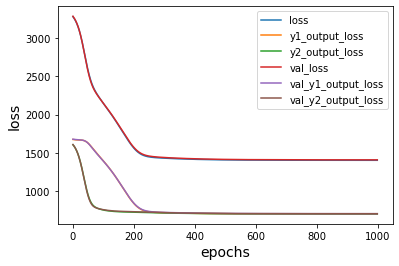

In [12]:
# Evalute the Model
model_2.evaluate(x_test_2, y_test_2)

# Plot loss VS epochs graph
pd.DataFrame(history_2.history).plot()
plt.ylabel('loss', fontsize=14)
plt.xlabel('epochs', fontsize=14)

In [13]:
predictions_2 = model_2.predict(x_test_2)
pred_1=predictions_2[0]
pred_2=predictions_2[1]
#pred_3=predictions[2]

4/4 [==============================] - 0s 2ms/step


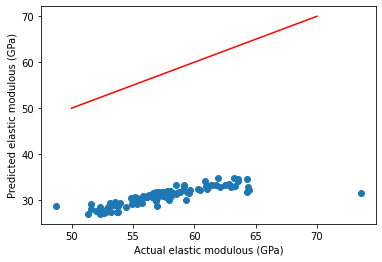

In [14]:
plt.scatter(y_test_2["elastic_modulous"],pred_1 ) #pred_2
plt.xlabel('Actual elastic modulous (GPa)')
plt.ylabel('Predicted elastic modulous (GPa)')
plt.plot([50,70],[50,70],marker=None,color="red")

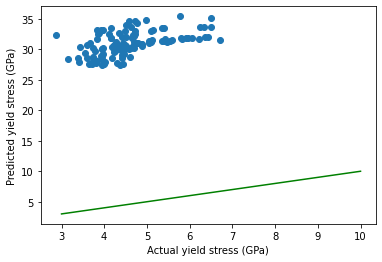

In [16]:
plt.scatter(y_test_2["stress_yield"],pred_2)
plt.xlabel('Actual yield stress (GPa)')
plt.ylabel('Predicted yield stress (GPa)')
plt.plot([3,10],[3,10],marker=None,color="green")